In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
data = iris.data
target = iris.target

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

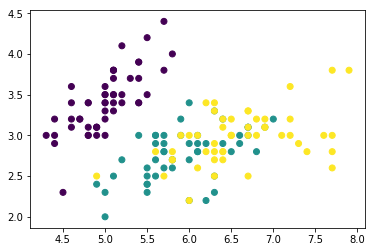

In [4]:
plt.scatter(data[:,0],data[:,1],c=target)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target)

In [10]:
# 先查看没有降维之前的算法评分
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier().fit(X_train,y_train).score(X_test,y_test)

0.9736842105263158

In [11]:
def cross_vrify(model,data,target):
    scores = []
    for i in [0.1,0.2,0.3]:
        X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=i,random_state=1)
        score = model.fit(X_train,y_train).score(X_test,y_test)
        scores.append(score)
    return np.array(scores).mean()

In [18]:
cross_vrify(KNeighborsClassifier(),data,target)

0.9925925925925926

In [19]:
# 使用PCA进行降维，观察数据变化
from sklearn.decomposition import PCA

In [20]:
# n_components 整数值或者小数值
# 整数：表示要降维到剩下几个特征
# 小数（0-1）：表示降维的方向各个特征的方差贡献度的累计比例
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
data.shape

(150, 4)

In [22]:
pca_data = pca.transform(data)

In [23]:
pca_data.shape

(150, 2)

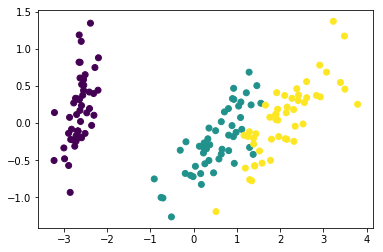

In [25]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=target)

In [40]:
cross_vrify(KNeighborsClassifier(),pca_data,target)

1.0

In [ ]:
# 结论：降维之后的数据集，并没有对算法评分产生太大的影响

In [42]:
# 导入LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(data,target)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [48]:
lda_data = lda.transform(data)

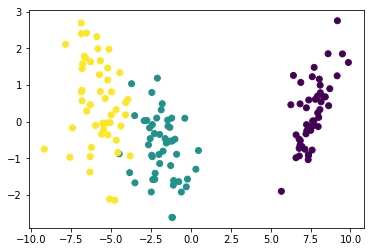

In [50]:
plt.scatter(lda_data[:,0],lda_data[:,1],c= target)

In [59]:
cross_vrify(KNeighborsClassifier(),lda_data,target)

0.9740740740740742

In [ ]:
# 降低数据特征的维度的好处
# 1.会节省算法的运行时间
# 2.提高算法的准确性（避免过拟合）